<a href="https://colab.research.google.com/github/AirSunday/Study_Data_Analysis/blob/main/%D0%9C%D0%9E%D0%B8%D0%9D%D0%A1/%D0%9C%D0%9E%D0%B8%D0%9D%D0%A1_%D0%9B%D0%B0%D0%B11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Конструирование признаков

**Пономарев Александр Федорович**

Студент 2 коруса физико-математического института,

направления ФИТ,

группы ФИТ-23

In [56]:
import pandas as pd
from pandas import read_csv, DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
import pandas as pd

# Указываем путь к файлу
file_path = '/content/drive/MyDrive/Data_Analysis/Crime_Data_from_2020_to_Present.csv'


datasetOriginal = pd.read_csv(
    file_path,
    sep=',',
    quotechar='"',
    nrows=100
)

# Проверяем размер датасета
print(f"Загружено строк: {len(datasetOriginal)}")
print(datasetOriginal.head(3))

Загружено строк: 100
   division_number date_reported        date_occurred  area  area_name  \
0         10304468    2020-01-08  2020-01-08 22:30:00     3  Southwest   
1        190101086    2020-01-02  2020-01-01 03:30:00     1    Central   
2        200110444    2020-04-14  2020-02-13 12:00:00     1    Central   

   reporting_district  part  crime_code  \
0                 377     2         624   
1                 163     2         624   
2                 155     2         845   

                           crime_description  modus_operandi  ...  status  \
0                   BATTERY - SIMPLE ASSAULT       0444 0913  ...      AO   
1                   BATTERY - SIMPLE ASSAULT  0416 1822 1414  ...      IC   
2  SEX OFFENDER REGISTRANT OUT OF COMPLIANCE            1501  ...      AA   

  status_description crime_code_1  crime_code_2 crime_code_3  crime_code_4  \
0        Adult Other        624.0           NaN          NaN           NaN   
1        Invest Cont        624.0           

In [59]:
column_translation = {
    'division_number': 'Номер_подразделения',
    'date_reported': 'Дата_сообщения',
    'date_occurred': 'Дата_происшествия',
    'area': 'Район_код',
    'area_name': 'Название_района',
    'reporting_district': 'Отчетный_округ',
    'part': 'Часть_преступления',
    'crime_code': 'Код_преступления',
    'crime_description': 'Описание_преступления',
    'modus_operandi': 'Метод_совершения',
    'victim_age': 'Возраст_жертвы',
    'victim_sex': 'Пол_жертвы',
    'victim_descent': 'Происхождение_жертвы',
    'premise_code': 'Код_места',
    'premise_description': 'Описание_места',
    'weapon_code': 'Код_оружия',
    'weapon_description': 'Описание_оружия',
    'status': 'Статус_код',
    'status_description': 'Описание_статуса',
    'crime_code_1': 'Код_преступления_1',
    'crime_code_2': 'Код_преступления_2',
    'crime_code_3': 'Код_преступления_3',
    'crime_code_4': 'Код_преступления_4',
    'location': 'Местоположение',
    'cross_street': 'Перекресток',
    'latitude': 'Широта',
    'longitude': 'Долгота'
}

dataset = datasetOriginal.rename(columns=column_translation)

print(dataset.head(0))

Empty DataFrame
Columns: [Номер_подразделения, Дата_сообщения, Дата_происшествия, Район_код, Название_района, Отчетный_округ, Часть_преступления, Код_преступления, Описание_преступления, Метод_совершения, Возраст_жертвы, Пол_жертвы, Происхождение_жертвы, Код_места, Описание_места, Код_оружия, Описание_оружия, Статус_код, Описание_статуса, Код_преступления_1, Код_преступления_2, Код_преступления_3, Код_преступления_4, Местоположение, Перекресток, Широта, Долгота]
Index: []

[0 rows x 27 columns]


In [60]:
dataset.head(1)

,Номер_подразделения,Дата_сообщения,Дата_происшествия,Район_код,Название_района,Отчетный_округ,Часть_преступления,Код_преступления,Описание_преступления,Метод_совершения,...,Статус_код,Описание_статуса,Код_преступления_1,Код_преступления_2,Код_преступления_3,Код_преступления_4,Местоположение,Перекресток,Широта,Долгота
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978


In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [62]:
# Убедимся, что дата в правильном формате
dataset['Дата_происшествия'] = pd.to_datetime(dataset['Дата_происшествия'])
dataset['Дата_сообщения'] = pd.to_datetime(dataset['Дата_сообщения'])

# Добавим столбец "Год" и "Месяц" для временного анализа
dataset['Год'] = dataset['Дата_происшествия'].dt.year
dataset['Месяц'] = dataset['Дата_происшествия'].dt.month

<ipython-input-63-785f2ff79aa3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


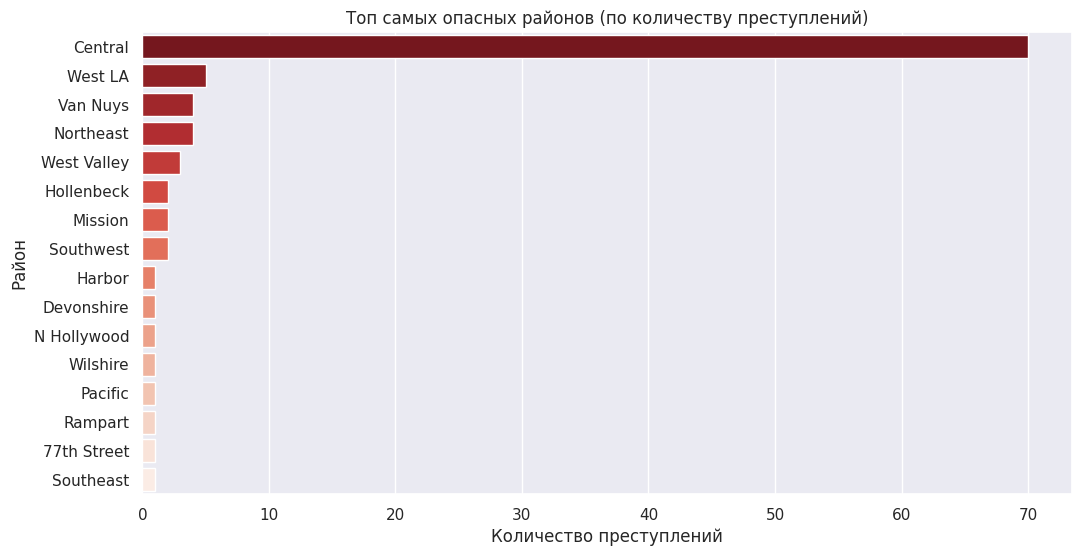

In [63]:
plt.figure(figsize=(12, 6))
sns.countplot(
    y='Название_района',
    data=dataset,
    order=dataset['Название_района'].value_counts().index,
    palette='Reds_r'
)
plt.title('Топ самых опасных районов (по количеству преступлений)')
plt.xlabel('Количество преступлений')
plt.ylabel('Район')
plt.show()

<ipython-input-64-bc6809b4b230>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


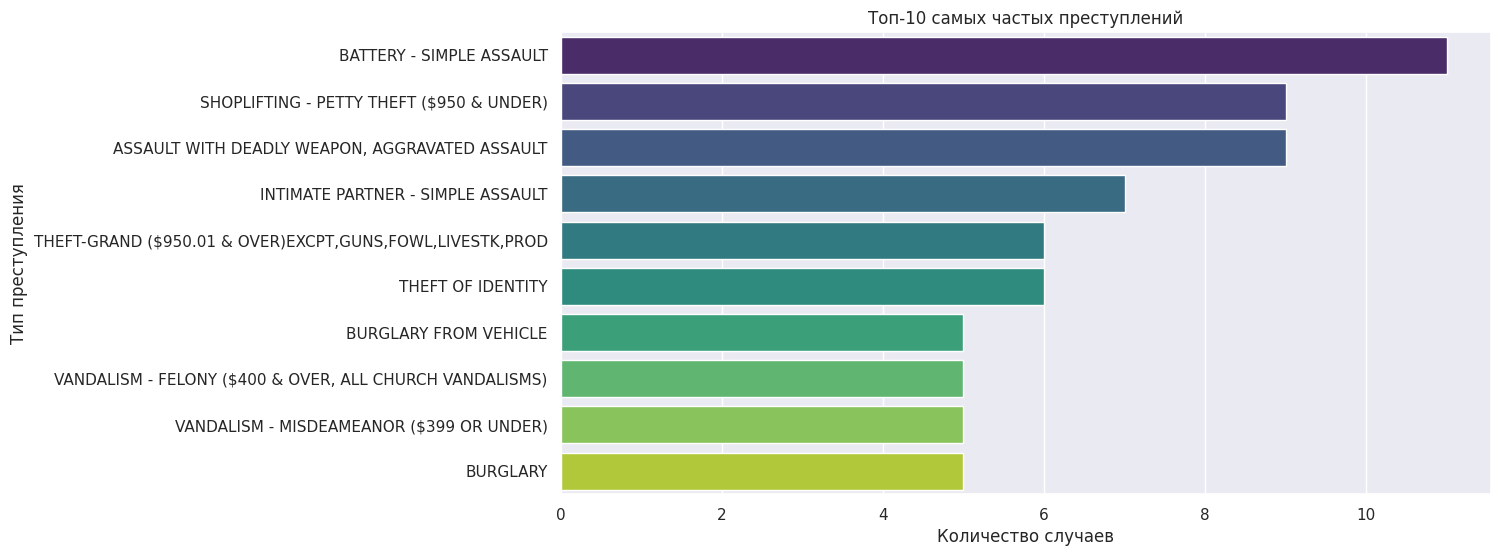

In [64]:
plt.figure(figsize=(12, 6))
top_crimes = dataset['Описание_преступления'].value_counts().head(10)
sns.barplot(
    x=top_crimes.values,
    y=top_crimes.index,
    palette='viridis'
)
plt.title('Топ-10 самых частых преступлений')
plt.xlabel('Количество случаев')
plt.ylabel('Тип преступления')
plt.show()

<ipython-input-65-b3fc808204b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


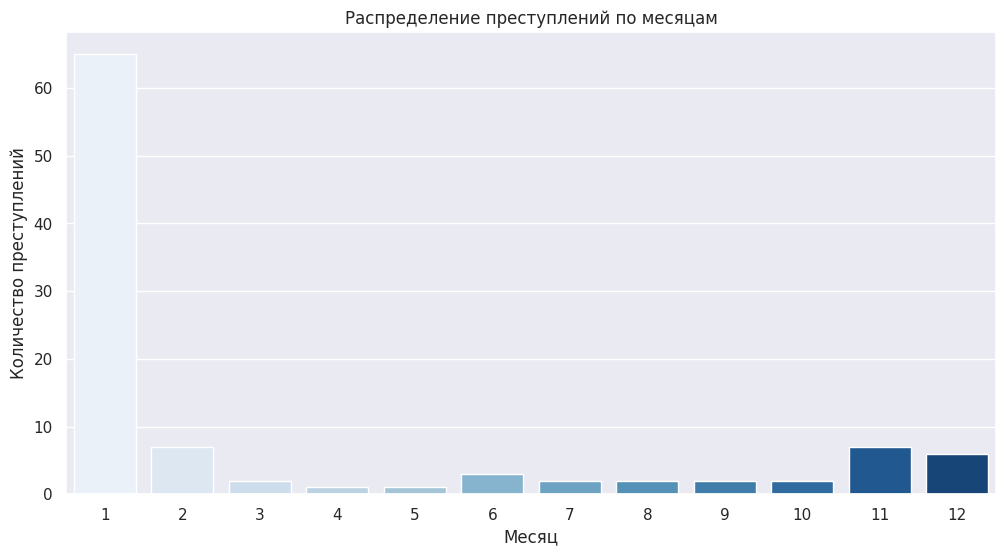

In [65]:
plt.figure(figsize=(12, 6))
sns.countplot(
    x='Месяц',
    data=dataset,
    palette='Blues'
)
plt.title('Распределение преступлений по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество преступлений')
plt.show()

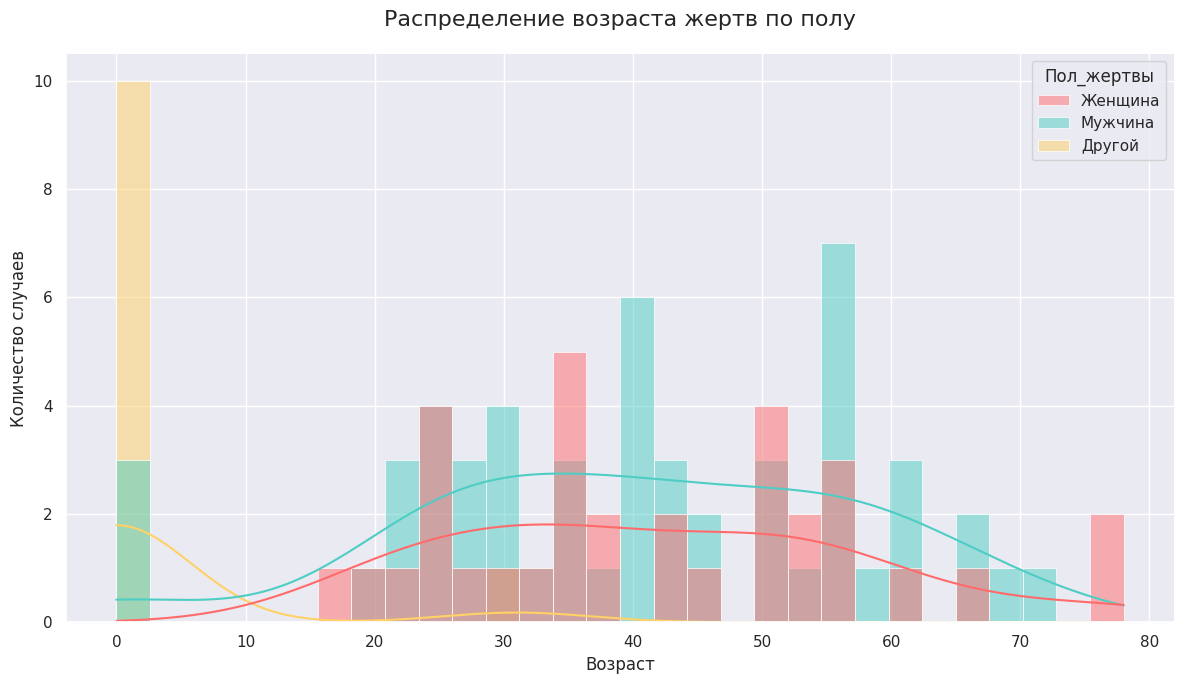

In [66]:
gender_translation = {
    'F': 'Женщина',
    'M': 'Мужчина',
    'X': 'Другой',
    'H': 'Неизвестно',
    '-': 'Не указано'
}

df_plot = dataset.copy()
df_plot['Пол_жертвы'] = df_plot['Пол_жертвы'].map(gender_translation)

gender_palette = {
    'Женщина': '#FF6B6B',
    'Мужчина': '#4ECDC4',
    'Другой': '#FFD166',
    'Неизвестно': '#888888',
    'Не указано': '#C5CBE3'
}

plt.figure(figsize=(12, 7))
sns.histplot(
    data=df_plot,
    x='Возраст_жертвы',
    hue='Пол_жертвы',
    bins=30,
    kde=True,
    palette=gender_palette,
    edgecolor='white',
    linewidth=0.5
)

plt.title('Распределение возраста жертв по полу', fontsize=16, pad=20)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество случаев', fontsize=12)

sns.despine()
plt.tight_layout()
plt.show()

<ipython-input-67-bd18e26c434b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


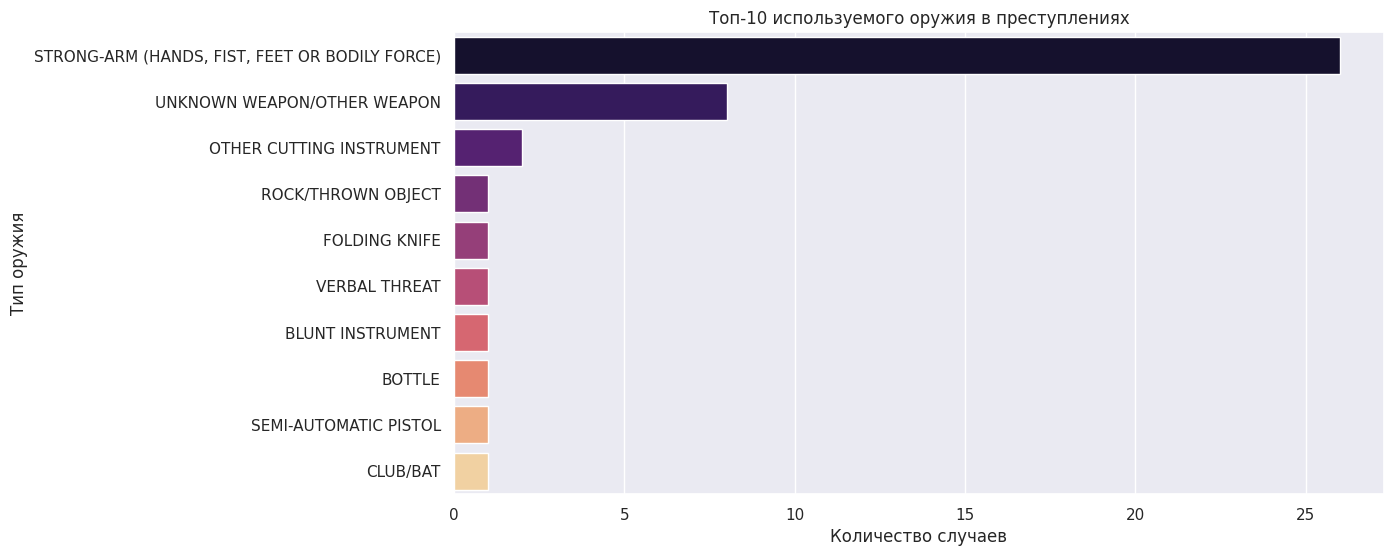

In [67]:
plt.figure(figsize=(12, 6))
top_weapons = dataset['Описание_оружия'].value_counts().head(10)
sns.barplot(
    x=top_weapons.values,
    y=top_weapons.index,
    palette='magma'
)
plt.title('Топ-10 используемого оружия в преступлениях')
plt.xlabel('Количество случаев')
plt.ylabel('Тип оружия')
plt.show()

In [68]:

crime_map = folium.Map(
    location=[dataset['Широта'].mean(), dataset['Долгота'].mean()],
    zoom_start=12
)

# Добавляем кластеры для удобства
from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(crime_map)

for idx, row in dataset.dropna(subset=['Широта', 'Долгота']).iterrows():
    folium.Marker(
        location=[row['Широта'], row['Долгота']],
        popup=f"{row['Описание_преступления']} ({row['Дата_происшествия']})",
        icon=folium.Icon(color='red')
    ).add_to(marker_cluster)

crime_map